# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve 
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Importing Dataset

In [2]:
df = pd.read_csv('CVD_cleaned.csv')

df.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163.0,72.57,27.46,Yes,0.0,12.0,12.0,4.0
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163.0,91.63,34.67,No,0.0,12.0,12.0,1.0


# Data Understanding

In [3]:
# Looking shape of the dataset before removing duplicates

df.shape

(308854, 19)

In [4]:
# Looking shape of the dataset after removing duplicates

df.drop_duplicates(inplace = True)
df.shape

(308774, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308774 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308774 non-null  object 
 1   Checkup                       308774 non-null  object 
 2   Exercise                      308774 non-null  object 
 3   Heart_Disease                 308774 non-null  object 
 4   Skin_Cancer                   308774 non-null  object 
 5   Other_Cancer                  308774 non-null  object 
 6   Depression                    308774 non-null  object 
 7   Diabetes                      308774 non-null  object 
 8   Arthritis                     308774 non-null  object 
 9   Sex                           308774 non-null  object 
 10  Age_Category                  308774 non-null  object 
 11  Height_(cm)                   308774 non-null  float64
 12  Weight_(kg)                   308774 non-nul

In [6]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [7]:
df.describe(include = 'all')

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308774,308774,308774,308774,308774,308774,308774,308774,308774,308774,308774,308774.000000,308774.000000,308774.000000,308774,308774.000000,308774.000000,308774.000000,308774.000000
unique,5,5,2,2,2,2,2,4,2,2,13,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
freq,110351,239295,239305,283803,278782,278897,246875,259062,207711,160155,33425,NaN,NaN,NaN,183516,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.615220,83.590399,28.626813,NaN,5.097557,29.834290,15.109517,6.297237
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.658452,21.344664,6.522810,NaN,8.200434,24.877812,14.926912,8.583837
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,24.950000,12.020000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,68.040000,24.210000,NaN,0.000000,12.000000,4.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.000000,81.650000,27.440000,NaN,1.000000,30.000000,12.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.000000,95.250000,31.850000,NaN,6.000000,30.000000,20.000000,8.000000


In [8]:
# Bringing "Heart_Disease" column to the end of the dataset

df = df[['General_Health','Checkup', 'Exercise', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption','Heart_Disease']]

df.head(10)

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,No
1,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,Yes
2,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,No
3,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,Yes
4,Good,Within the past year,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,No
5,Good,Within the past year,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0,No
6,Fair,Within the past year,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0,Yes
7,Good,Within the past year,Yes,No,No,No,No,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0,No
8,Fair,Within the past year,No,No,No,Yes,No,No,Female,65-69,163.0,72.57,27.46,Yes,0.0,12.0,12.0,4.0,No
9,Fair,Within the past year,No,No,No,No,Yes,Yes,Female,70-74,163.0,91.63,34.67,No,0.0,12.0,12.0,1.0,No


In [9]:
# Looking for any NA values 

df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
Heart_Disease                   0
dtype: int64

# Data Visualization

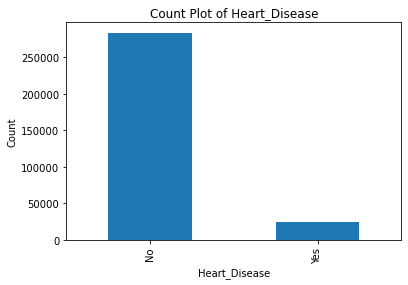

In [10]:
# Create a count plot using pandas' built-in functionality
count_plot = df['Heart_Disease'].value_counts().plot(kind='bar')

# Adding labels and title
count_plot.set_xlabel('Heart_Disease')
count_plot.set_ylabel('Count')
count_plot.set_title('Count Plot of Heart_Disease')

plt.show()

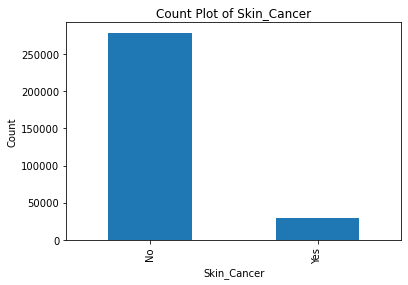

In [11]:
# Create a count plot using pandas' built-in functionality
count_plot = df['Skin_Cancer'].value_counts().plot(kind='bar')

# Adding labels and title
count_plot.set_xlabel('Skin_Cancer')
count_plot.set_ylabel('Count')
count_plot.set_title('Count Plot of Skin_Cancer')

plt.show()

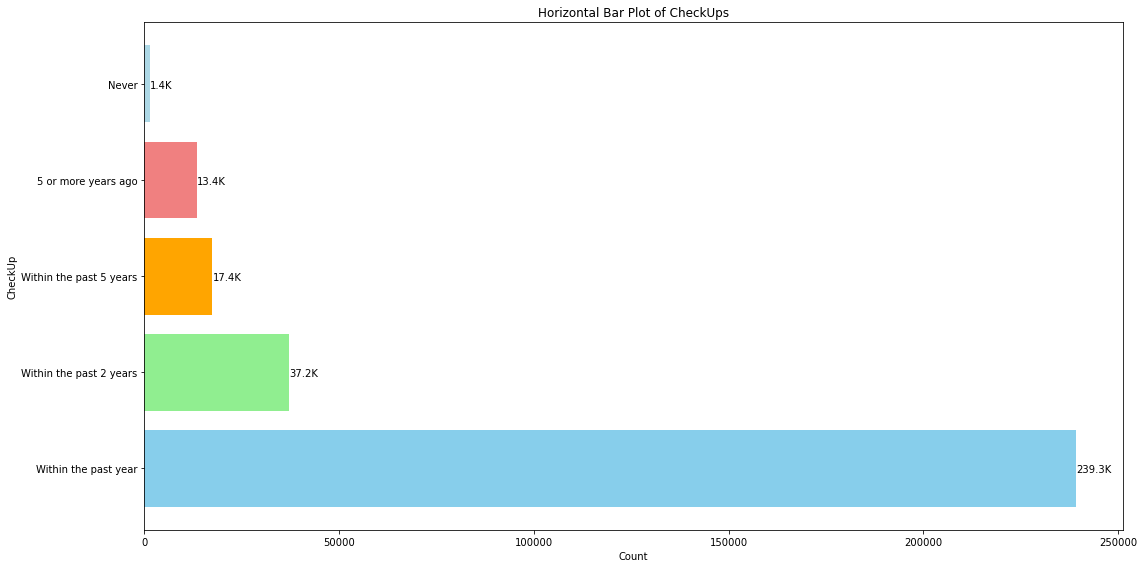

In [12]:
# Count the occurrences of each category
count_data = df['Checkup'].value_counts()

# Create a horizontal bar plot using matplotlib with custom colors
plt.figure(figsize=(16, 8))  # Adjust the figure size

# Plot the bars with different colors
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral', 'lightblue', 'pink']
bars = plt.barh(count_data.index, count_data.values, color=colors)

# Annotate the bars
for bar in bars:
    value = bar.get_width() / 1000  # Convert width to thousands
    plt.text(bar.get_width() + 0.2,
             bar.get_y() + bar.get_height()/2,
             f'{value:.1f}K',  # Format the value to display in thousands
             va='center_baseline',
             ha='left',
             color='black')

# Remove the grid lines
plt.grid(False)

plt.xlabel('Count')
plt.ylabel('CheckUp')
plt.title('Horizontal Bar Plot of CheckUps')

plt.tight_layout()
plt.show()

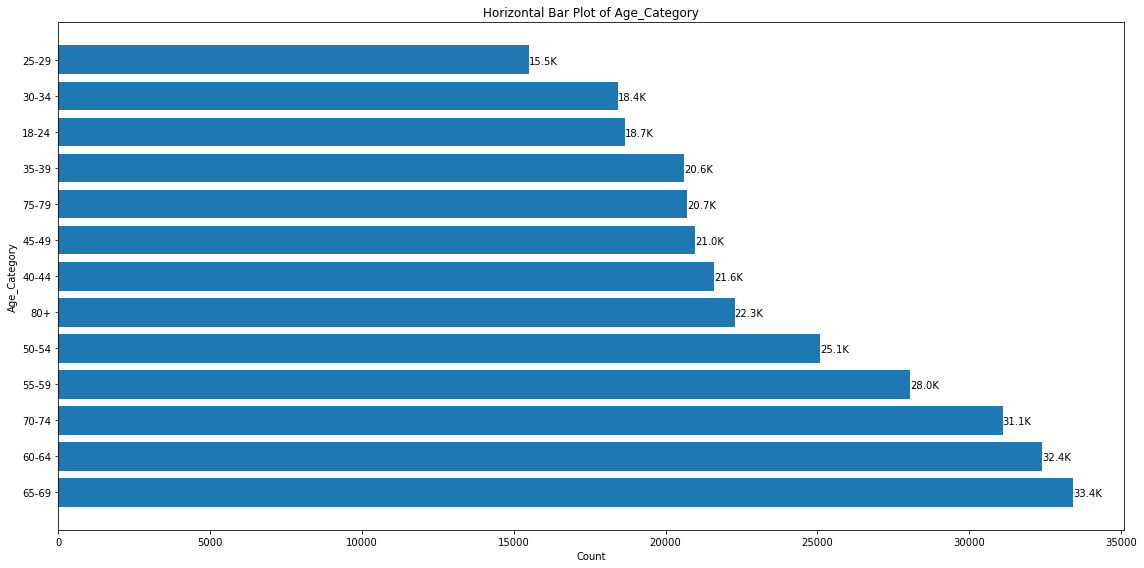

In [13]:
# Count the occurrences of each category
count_data = df['Age_Category'].value_counts()

# Create a horizontal bar plot using matplotlib with custom colors
plt.figure(figsize=(16, 8))  # Adjust the figure size

bars = plt.barh(count_data.index, count_data.values)

# Annotate the bars
for bar in bars:
    value = bar.get_width() / 1000  # Convert width to thousands
    plt.text(bar.get_width() + 0.2,
             bar.get_y() + bar.get_height()/2,
             f'{value:.1f}K',  # Format the value to display in thousands
             va='center_baseline',
             ha='left',
             color='black')

# Remove the grid lines
plt.grid(False)

plt.xlabel('Count')
plt.ylabel('Age_Category')
plt.title('Horizontal Bar Plot of Age_Category')

plt.tight_layout()
plt.show()

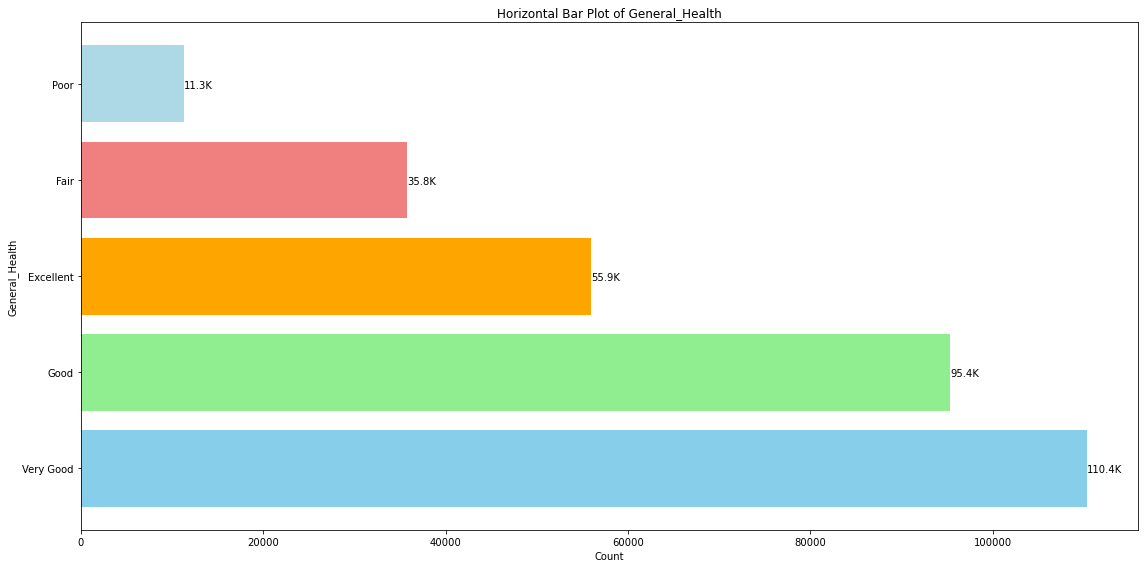

In [14]:
# Count the occurrences of each category
count_data = df['General_Health'].value_counts()

# Create a horizontal bar plot using matplotlib with custom colors
plt.figure(figsize=(16, 8))  # Adjust the figure size

# Plot the bars with different colors
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral', 'lightblue', 'pink']
bars = plt.barh(count_data.index, count_data.values, color=colors)

# Annotate the bars
for bar in bars:
    value = bar.get_width() / 1000  # Convert width to thousands
    plt.text(bar.get_width() + 0.2,
             bar.get_y() + bar.get_height()/2,
             f'{value:.1f}K',  # Format the value to display in thousands
             va='center_baseline',
             ha='left',
             color='black')

# Remove the grid lines
plt.grid(False)

plt.xlabel('Count')
plt.ylabel('General_Health')
plt.title('Horizontal Bar Plot of General_Health')

plt.tight_layout()
plt.show()

# Data Preprocessing

In [15]:
df.head(5)

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,No
1,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,Yes
2,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,No
3,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,Yes
4,Good,Within the past year,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,No


## Removing outliers from Height_(cm)

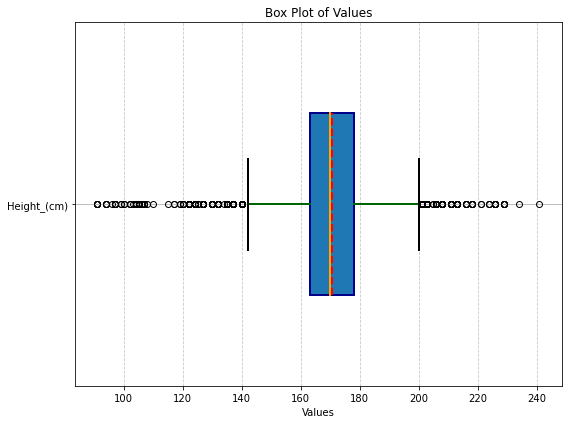

In [16]:
# Create a box plot for a single column
plt.figure(figsize=(8, 6))
boxprops = dict(linewidth=2, color='darkblue')
medianprops = dict(linewidth=2, color='orange')
capprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='darkgreen')

boxplot = df.boxplot(
    column='Height_(cm)',
    vert=False,  # Horizontal box plot
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    capprops=capprops,
    whiskerprops=whiskerprops,
    widths=0.5,
    showmeans=True,
    meanline=True,
    meanprops=dict(linewidth=2, color='red')
)

# Customizing the plot
plt.title('Box Plot of Values')
plt.xlabel('Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
# Calculate the median
median = df['Height_(cm)'].median()

# Calculate the IQR (Interquartile Range)
Q1 = df['Height_(cm)'].quantile(0.25)
Q3 = df['Height_(cm)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
df['Height_(cm)'] = df['Height_(cm)'].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

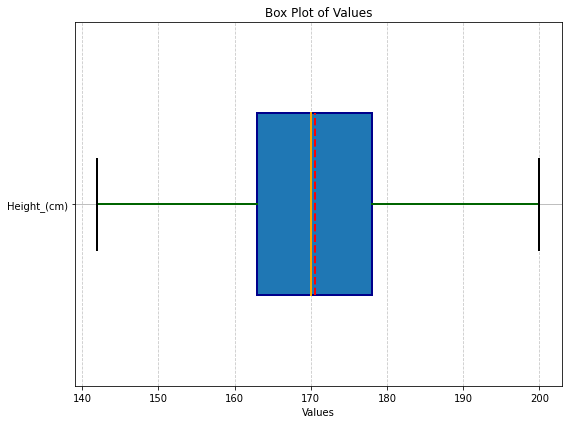

In [18]:
# Create a box plot for a single column
plt.figure(figsize=(8, 6))
boxprops = dict(linewidth=2, color='darkblue')
medianprops = dict(linewidth=2, color='orange')
capprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='darkgreen')

boxplot = df.boxplot(
    column='Height_(cm)',
    vert=False,  # Horizontal box plot
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    capprops=capprops,
    whiskerprops=whiskerprops,
    widths=0.5,
    showmeans=True,
    meanline=True,
    meanprops=dict(linewidth=2, color='red')
)

# Customizing the plot
plt.title('Box Plot of Values')
plt.xlabel('Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## Removing outliers from Weight_(kg)

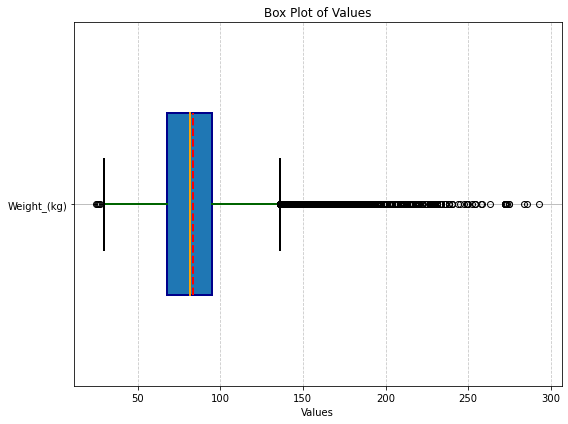

In [19]:
# Create a box plot for a single column
plt.figure(figsize=(8, 6))
boxprops = dict(linewidth=2, color='darkblue')
medianprops = dict(linewidth=2, color='orange')
capprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='darkgreen')

boxplot = df.boxplot(
    column='Weight_(kg)',
    vert=False,  # Horizontal box plot
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    capprops=capprops,
    whiskerprops=whiskerprops,
    widths=0.5,
    showmeans=True,
    meanline=True,
    meanprops=dict(linewidth=2, color='red')
)

# Customizing the plot
plt.title('Box Plot of Values')
plt.xlabel('Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
# Calculate the median
median = df['Weight_(kg)'].median()

# Calculate the IQR (Interquartile Range)
Q1 = df['Weight_(kg)'].quantile(0.25)
Q3 = df['Weight_(kg)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
df['Weight_(kg)'] = df['Weight_(kg)'].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

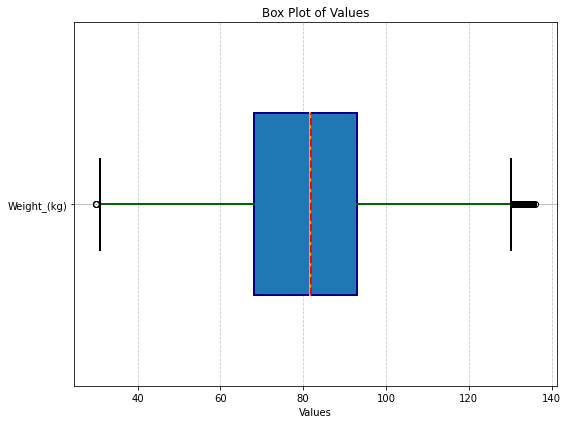

In [21]:
# Create a box plot for a single column
plt.figure(figsize=(8, 6))
boxprops = dict(linewidth=2, color='darkblue')
medianprops = dict(linewidth=2, color='orange')
capprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='darkgreen')

boxplot = df.boxplot(
    column='Weight_(kg)',
    vert=False,  # Horizontal box plot
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    capprops=capprops,
    whiskerprops=whiskerprops,
    widths=0.5,
    showmeans=True,
    meanline=True,
    meanprops=dict(linewidth=2, color='red')
)

# Customizing the plot
plt.title('Box Plot of Values')
plt.xlabel('Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## Removing outliers from BMI

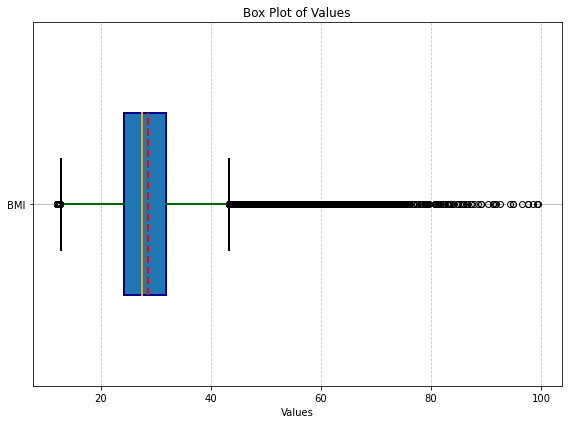

In [22]:
# Create a box plot for a single column
plt.figure(figsize=(8, 6))
boxprops = dict(linewidth=2, color='darkblue')
medianprops = dict(linewidth=2, color='orange')
capprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='darkgreen')

boxplot = df.boxplot(
    column='BMI',
    vert=False,  # Horizontal box plot
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    capprops=capprops,
    whiskerprops=whiskerprops,
    widths=0.5,
    showmeans=True,
    meanline=True,
    meanprops=dict(linewidth=2, color='red')
)

# Customizing the plot
plt.title('Box Plot of Values')
plt.xlabel('Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
# Calculate the median
median = df['BMI'].median()

# Calculate the IQR (Interquartile Range)
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
df['BMI'] = df['BMI'].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

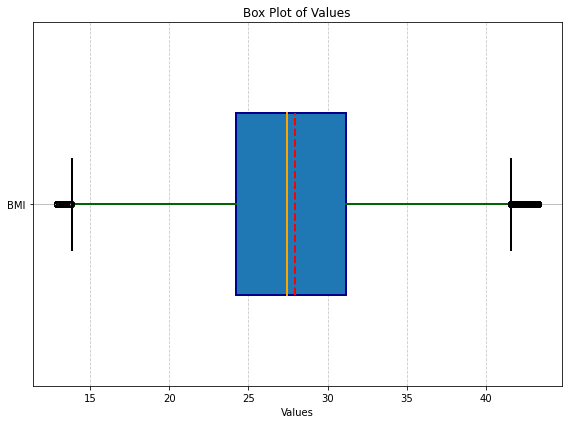

In [24]:
# Create a box plot for a single column
plt.figure(figsize=(8, 6))
boxprops = dict(linewidth=2, color='darkblue')
medianprops = dict(linewidth=2, color='orange')
capprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='darkgreen')

boxplot = df.boxplot(
    column='BMI',
    vert=False,  # Horizontal box plot
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    capprops=capprops,
    whiskerprops=whiskerprops,
    widths=0.5,
    showmeans=True,
    meanline=True,
    meanprops=dict(linewidth=2, color='red')
)

# Customizing the plot
plt.title('Box Plot of Values')
plt.xlabel('Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## Removing outliers from FriedPotato_Consumption



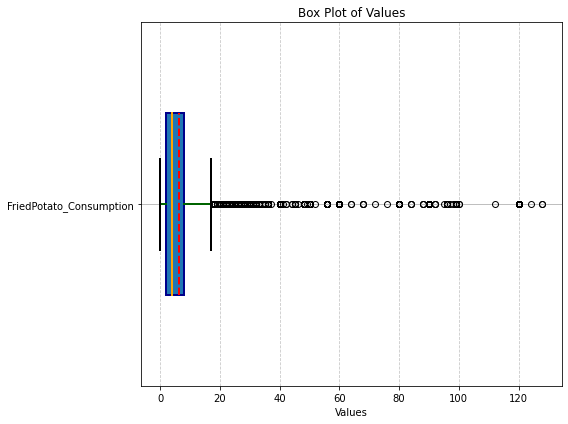

In [25]:
# Create a box plot for a single column
plt.figure(figsize=(8, 6))
boxprops = dict(linewidth=2, color='darkblue')
medianprops = dict(linewidth=2, color='orange')
capprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='darkgreen')

boxplot = df.boxplot(
    column='FriedPotato_Consumption',
    vert=False,  # Horizontal box plot
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    capprops=capprops,
    whiskerprops=whiskerprops,
    widths=0.5,
    showmeans=True,
    meanline=True,
    meanprops=dict(linewidth=2, color='red')
)

# Customizing the plot
plt.title('Box Plot of Values')
plt.xlabel('Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
# Calculate the median
median = df['FriedPotato_Consumption'].median()

# Calculate the IQR (Interquartile Range)
Q1 = df['FriedPotato_Consumption'].quantile(0.25)
Q3 = df['FriedPotato_Consumption'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
df['FriedPotato_Consumption'] = df['FriedPotato_Consumption'].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

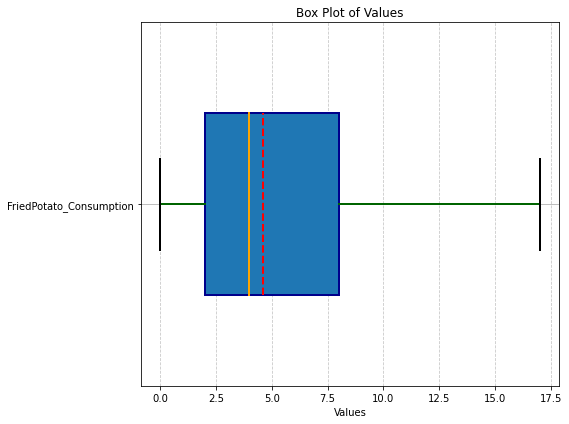

In [27]:
# Create a box plot for a single column
plt.figure(figsize=(8, 6))
boxprops = dict(linewidth=2, color='darkblue')
medianprops = dict(linewidth=2, color='orange')
capprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='darkgreen')

boxplot = df.boxplot(
    column='FriedPotato_Consumption',
    vert=False,  # Horizontal box plot
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    capprops=capprops,
    whiskerprops=whiskerprops,
    widths=0.5,
    showmeans=True,
    meanline=True,
    meanprops=dict(linewidth=2, color='red')
)

# Customizing the plot
plt.title('Box Plot of Values')
plt.xlabel('Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## Mapping


In [28]:
df['Checkup'].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

In [29]:
df['General_Health'].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [30]:
df['Age_Category'].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [31]:
df['Diabetes'].unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

In [32]:
checkup = {'Within the past 2 years':0, 'Within the past year':1,
       '5 or more years ago':2, 'Within the past 5 years':3, 'Never':4}
exercise = {'No':0, 'Yes':1}
heart_disease = {'No':0, 'Yes':1}
skin_cancer = {'No':0, 'Yes':1}
other_cancer = {'No':0, 'Yes':1}
depression = {'No':0, 'Yes':1}
diabetes = {'No':0, 'Yes':1, 'No, pre-diabetes or borderline diabetes':2,
       'Yes, but female told only during pregnancy':3}
arthritis = {'No':0, 'Yes':1}
sex = {'Male':0, 'Female':1, 'Other': 2}
smoking_history = {'No':0, 'Yes':1}
general_health = {'Poor':0, 'Very Good':3, 'Good':2, 'Fair':1, 'Excellent':4}
age = {'70-74':11, '60-64':9, '75-79':12, '80+':13, '65-69':10, '50-54':7, '45-49':6,
       '18-24':0, '30-34':3, '55-59':8, '35-39':4, '40-44':5, '25-29':1}

In [33]:
df['Checkup'] = df['Checkup'].map(checkup)
df['Exercise'] = df['Exercise'].map(exercise)
df['Heart_Disease'] = df['Heart_Disease'].map(heart_disease)
df['Skin_Cancer'] = df['Skin_Cancer'].map(skin_cancer)
df['Other_Cancer'] = df['Other_Cancer'].map(other_cancer)
df['Depression'] = df['Depression'].map(depression)
df['Diabetes'] = df['Diabetes'].map(diabetes)
df['Arthritis'] = df['Arthritis'].map(arthritis)
df['Sex'] = df['Sex'].map(sex)
df['Smoking_History'] = df['Smoking_History'].map(smoking_history)
df['General_Health'] = df['General_Health'].map(general_health)
df['Age_Category'] = df['Age_Category'].map(age)

In [34]:
df.head(5)

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,0,0,0,0,0,0,0,1,1,11,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,0
1,3,1,0,0,0,0,1,0,1,11,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,1
2,3,1,1,0,0,0,1,0,1,9,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,0
3,0,1,1,0,0,0,1,0,0,12,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,1
4,2,1,0,0,0,0,0,0,0,13,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0


# Data Modeling

In [35]:
# Separate Target Variable and Predictor Variables
TargetVariable='Heart_Disease'
Predictors=['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

X = df[Predictors].values
y = df[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Define the pipeline
resampling = SMOTE(sampling_strategy='minority') # resampling strategy is set to 'minority' to resample the minority class
tomek = TomekLinks(sampling_strategy='majority') # sampling strategy is set to 'majority' to undersample the majority class
scaler = MinMaxScaler()
model = XGBClassifier(scale_pos_weight=sum(y==0)/sum(y==1), # adjust class weights due to class imbalance
                      eval_metric='logloss', # use logloss to evaluate performance
                      use_label_encoder=False) # to avoid warning message
pipeline = Pipeline([('MinMaxScale', scaler), ('SMOTE', resampling), ('TomekLinks', tomek), ('Model', model)])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss', gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     85100
           1       0.21      0.76      0.32      7533

    accuracy                           0.74     92633
   macro avg       0.59      0.75   

<AxesSubplot:>

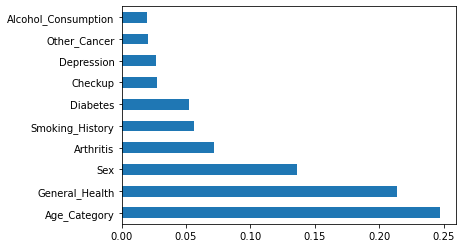

In [37]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
model = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
    eval_metric='logloss', # use logloss to evaluate performance
    use_label_encoder=False # to avoid warning message
)

# Printing all the parameters of XGBoost
print(model)

# Creating the model on Training Data
XGB=model.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [38]:
# Define the model with default hyperparameters
model = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
    eval_metric='logloss', # use logloss to evaluate performance
    use_label_encoder=False # to avoid warning message
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

## Classification Report

In [39]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     85100
           1       0.21      0.76      0.32      7533

    accuracy                           0.74     92633
   macro avg       0.59      0.75      0.58     92633
weighted avg       0.91      0.74      0.80     92633



## Confusion Matrix

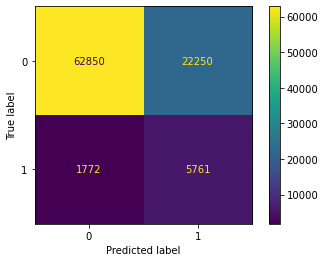

In [40]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

## ROC Curve and ROC Area

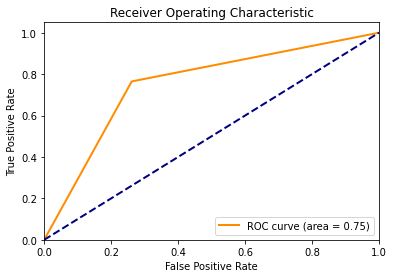

In [41]:
# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

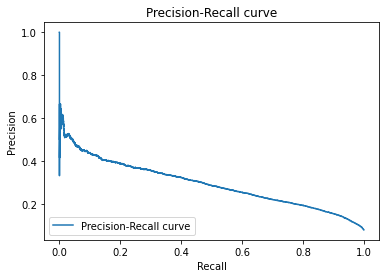

In [42]:
# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

plt.show()

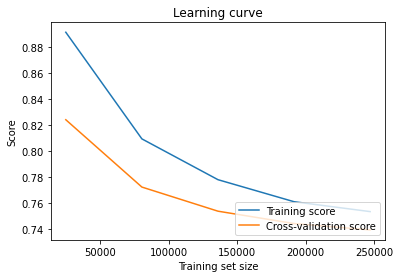

In [43]:
# Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend(loc="lower right")
plt.show()

# Result

The skilled model underwent an extensive evaluation, employing a variety of metrics like precision, recall, F1-score, and the captivating area under the ROC curve (AUC). Delving into the classification report, a mesmerizing sight unfolds: for class 0, the model wields a precision akin to a sharpshooter's aim (0.97) 🎯, yet its recall wavers like a dancer caught in a swirl (0.74) 🔄. However, in a delightful twist, class 1 emerges, boasting a precision that's as elusive as a hidden treasure (0.21), yet its recall shines bright like a guiding star (0.76). The F1-scores reveal their tale: class 0 standing tall at 0.84, while class 1 hums a lower tune at 0.32, painting a picture of class 0's supremacy in the model's predictions. The grand tapestry of the model's overall accuracy unfurls at 0.74 🎲.

As the mist clears on the confusion matrix, a spectacle takes shape: a bountiful hoard of true negatives (5761) ✔️ rests beside a cascading waterfall of false positives (22250) ❌. It's as if the model, an oracle of sorts, occasionally confuses the echoes of class 0 for the whispers of class 1. Amidst the tableau, false negatives assume a modest stance, mere whispers (1772), while true positives join the chorus in humble numbers (62850).

A glance at the mesmerizing area under the ROC curve reveals a score of 0.75, akin to a seasoned voyager navigating the treacherous waters of distinguishing between positive and negative classes 📈.

And then, the Precision-Recall curve steps onto the stage, its performance an enigmatic dance. It opens with a flourish of perfect recall, a trait as rare as a comet's visit. Yet, precision tiptoes delicately at the start, as if hesitant to commit. The delicate balance between these measures creates a portrait of the model's tendency to sway towards over-predicting the positive class ⚖️.

# Discussion

The findings unfold a tale of a model navigating the waters of accuracy and AUC, revealing a landscape marked by contrasting performances across the two distinct classes. While its overall accuracy and AUC stand as commendable achievements, the model's prowess diverges notably. It shines as a true luminary in the realm of predicting class 0, its predictions akin to a sage's insights. Yet, when it comes to the intricate realm of class 1, a unique drama unfolds — a drama of high recall but a faltering precision. This dynamic unveils a model treading cautiously when it comes to class 1, a strategy that births a flourish of false positives and a scarcity of true positives, like the ebb and flow of a mysterious dance 📉.

This asymmetrical performance could be an echo of the imbalance ingrained within the training data, a tale where the model seems drawn towards the majority class like a magnet to metal 🏭. To mend this imbalance, strategies of resampling could be summoned, each thread woven meticulously to harmonize the classes. Alternatively, the model's sensibilities could be recalibrated by adjusting the class weights or nudging the threshold, with the aim of rekindling its sensitivity to the minority class ↕️.

In the realm of possibilities, lies the path of enhancement through the art of feature engineering or the adoption of a more intricate or unconventional model. Yet, this journey, though enticing, must be undertaken with caution, each step validated meticulously to prevent the shadow of overfitting from falling across the model's aspirations 🎛️🔬.